Leidy Tatiana Sanchez Economia Circular


Los errores estándar asumen que la matriz de covarianza de los errores está correctamente especificada.
  El número de condición es grande, 2.13e+05. Esto podría indicar que hay
fuerte multicolinealidad u otro problema numérico

Dado al estudio y analisis de los datos se hayo que los visitantes estan dispuesto a pagar 2 dolares en el rango de 10 años para poder tener avistamientos de ballenas jovenes 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [ ]:
df=pd.read_csv("datos_whales.csv")

In [ ]:
df.head()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0


In [ ]:
df

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
df.iloc[0,0]
df.loc[0,"Age"]

31.0

In [ ]:
df.iloc[0,0]
df.loc[0,"Income"]

65000.5

In [ ]:
df.tail()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1
700,Australia,0,32.0,Male,Degree,"More than $70,000",85000.5,8,Yes,0.0,Same,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      701 non-null    object 
 1   SeeWhales    701 non-null    int64  
 2   Age          691 non-null    float64
 3   Gender       701 non-null    object 
 4   Education    701 non-null    object 
 5   Income_AUD   674 non-null    object 
 6   Income       674 non-null    float64
 7   AdultWhales  701 non-null    int64  
 8   YoungWhales  701 non-null    object 
 9   Max_wtp      701 non-null    float64
 10  wtp          701 non-null    object 
 11  PayConserve  701 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 65.8+ KB


In [ ]:
df.describe()

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
count,701.000000,691.000000,674.000000,701.000000,701.000000,701.000000
mean,0.126961,42.918958,44540.456973,6.058488,3.149786,0.660485
std,0.333168,15.562472,26362.209685,3.779758,18.043962,0.473883
min,0.000000,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,0.000000,41.000000,35000.500000,6.000000,0.000000,1.000000
75%,0.000000,54.500000,65000.500000,8.000000,2.000000,1.000000
max,1.000000,82.000000,85000.500000,30.000000,250.000000,1.000000


In [ ]:
df.isna().sum()

Country         0
SeeWhales       0
Age            10
Gender          0
Education       0
Income_AUD     27
Income         27
AdultWhales     0
YoungWhales     0
Max_wtp         0
wtp             0
PayConserve     0
dtype: int64

In [ ]:
df.dropna()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
q1=df["Age"].quantile(.25)
q3=df["Age"].quantile(.75)
qr=q3-q1

In [ ]:
q1

30.0

In [ ]:
q3

54.5

In [ ]:
qr


24.5

In [ ]:
lim_inf=q1-(1.5*qr)##limite inferior

In [ ]:
lim_inf

-6.75

In [ ]:
lim_sup=q3+(1.5*qr)


In [ ]:
lim_sup

91.25

In [ ]:
df[(df["Age"]>lim_inf)&(df["Age"]<lim_sup)]

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [ ]:
df.pivot_table(index=["Gender","Education"],
               values="Age",
               aggfunc=["mean","median"])

mean median
                                       Age    Age
Gender Education                                 
Female Completed year 10         45.863014   49.0
       Completed year 12         40.239437   37.0
       Degree                    37.222222   32.0
       Diploma                   37.210526   33.0
       Other - Specify           37.000000   37.0
       Post-graduate degree      39.959184   39.0
       Primary only              60.727273   69.0
       Some secondary schooling  52.114286   57.0
       Trade certificate         44.081081   40.0
Male   Completed year 10         49.185185   49.0
       Completed year 12         42.034483   39.0
       Degree                    41.140845   39.0
       Diploma                   45.838710   45.0
       Post-graduate degree      40.142857   38.0
       Primary only              55.333333   59.0
       Some secondary schooling  53.684211   57.0
       Trade certificate         46.378378   47.0

In [ ]:
df["Gender"].value_counts()

Female    435
Male      266
Name: Gender, dtype: int64

In [ ]:
df["Education"].value_counts(normalize=True)

Degree                      0.245364
Completed year 12           0.142653
Completed year 10           0.142653
Diploma                     0.125535
Post-graduate degree        0.121255
Trade certificate           0.106990
Some secondary schooling    0.078459
Primary only                0.035663
Other - Specify             0.001427
Name: Education, dtype: float64

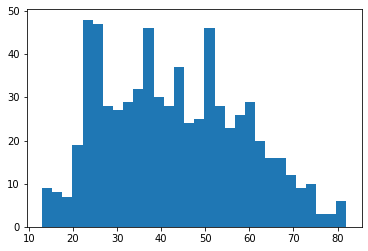

In [ ]:
plt.hist(df["Age"],
         bins=30)
plt.show ()

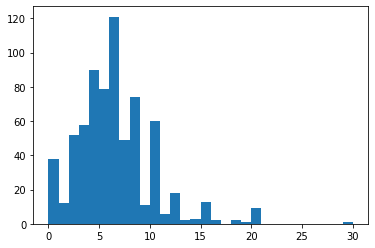

In [ ]:
plt.hist(df["AdultWhales"],
         bins=30)
plt.show ()


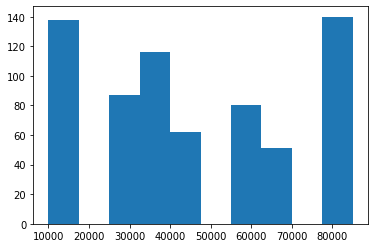

In [ ]:
plt.hist(df["Income"],
         bins=10)
plt.show ()

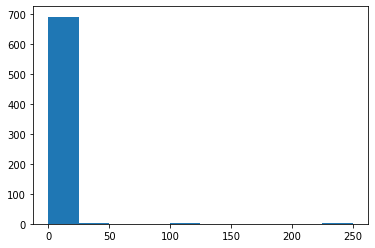

In [ ]:
plt.hist(df["Max_wtp"],
         bins=10)
plt.show ()

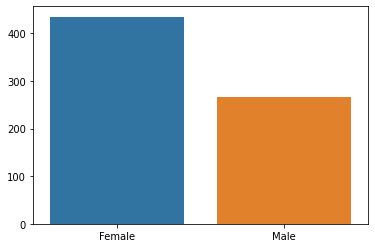

In [ ]:
sexo=df["Gender"].value_counts()
sns.barplot(x=sexo.index,
            y=sexo.values)
plt.show()

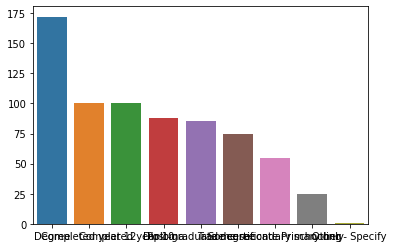

In [ ]:
Educacion=df["Education"].value_counts()
sns.barplot(x=Educacion.index,
            y=Educacion.values)
plt.show()


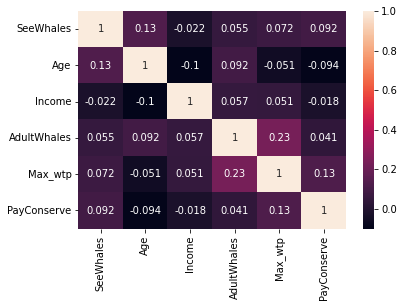

In [ ]:
sns.heatmap(df.corr(),
            annot=True)##gradico de correlacion
plt.show()

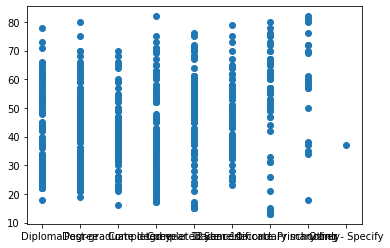

In [ ]:
plt.scatter(df["Education"],
            df["Age"])##dispersion 
plt.show()

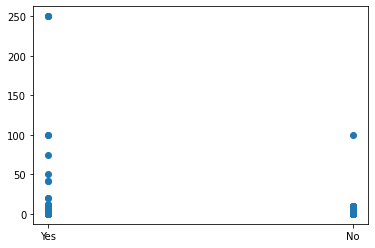

In [ ]:
plt.scatter(df["YoungWhales"],
            df["Max_wtp"])##dispersion 
plt.show()

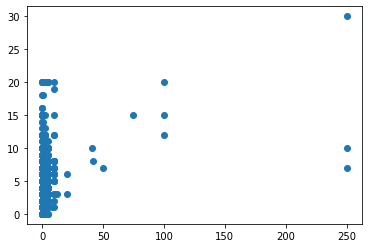

In [ ]:
plt.scatter(df["Max_wtp"],
            df["AdultWhales"])##dispersion 
plt.show()

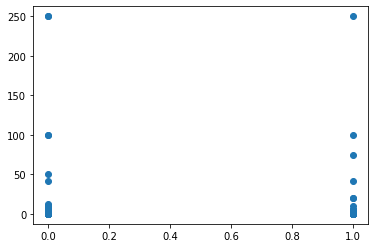

In [ ]:
plt.scatter(df["SeeWhales"],
            df["Max_wtp"])##dispersion 
plt.show()

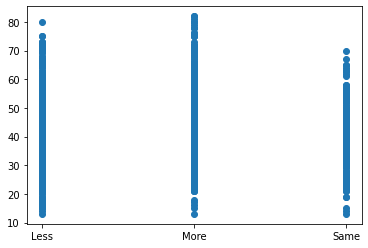

In [ ]:
plt.scatter(df["wtp"],
            df["Age"])##dispersion 
plt.show()

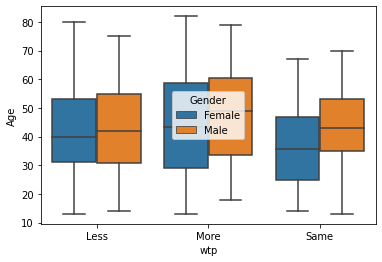

In [ ]:
sns.boxplot(data=df,
            x="wtp",
            y="Age",
            hue="Gender")##grafico de barras

plt.show()


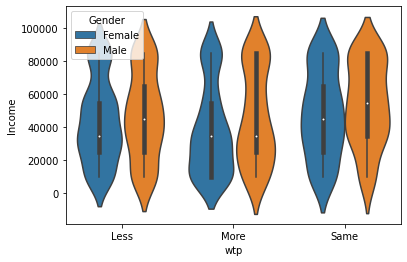

In [ ]:
sns.violinplot(data=df,
            x="wtp",
            y="Income",
            hue="Gender")##convinacion de histograma y diagrama de barras

plt.show()

In [ ]:
df = [["Age",	"Income",	"AdultWhales",	"Max_wtp",	"PayConserve",	"SeeWhales","YoungWhales_Yes"]]

In [ ]:
df= ["age","income","AdultWhales","youngwhales","Max_wtp","payconserve","SeeWhales"]

In [ ]:
df.duplicated().sum()

AttributeError: ignored

In [ ]:
df=df.drop_duplicates().reset_index(drop=True)

AttributeError: ignored

In [ ]:
df=df.dropna()

AttributeError: ignored

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df

,Max_wtp,SeeWhales,age,income,payconserve,youngwhales
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,0,1,0
6,0,1,0,0,0,0


In [ ]:

y=df.pop("PayConserve")
x=sm.add_constant(df.copy())
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

TypeError: ignored

In [ ]:
"str"

'str'

In [ ]:
----> 1 y=df.pop("PayConserve")


x=sm.add_constant(df.copy())
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

SyntaxError: ignored

In [ ]:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)

SyntaxError: ignored

In [ ]:
y=df.pop("PayConserve")
x=sm.add_constant(df.copy())
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

TypeError: ignored